<a href="https://colab.research.google.com/github/j0h4nM/ciencia_de_datos-/blob/main/ejercicio_censo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_excel("/content/CENSO POBLACIONAL AGOSTO.xlsx")

df.head()


,cod_dpto,Departamento,cod_mpio,Municipio,fec_paquete,num_paquete,num_ficha,ide_ficha_origen,ide_edificacion,ver_estructura,...,ide_Ug,persug,Capital,marca,estado,Linea_p,replicacion,fec_actualizacion_cns,C,Clasificacion
0,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,3,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.35,A02
1,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02
2,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02
3,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02
4,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02


In [ ]:
# Revisar nombres de columnas
df.columns


Index(['cod_dpto', 'Departamento', 'cod_mpio', 'Municipio', 'fec_paquete',
       'num_paquete', 'num_ficha', 'ide_ficha_origen', 'ide_edificacion',
       'ver_estructura',
       ...
       'ide_Ug', 'persug', 'Capital', 'marca', 'estado', 'Linea_p',
       'replicacion', 'fec_actualizacion_cns', 'C', 'Clasificacion'],
      dtype='object', length=255)

In [ ]:
# Información general del DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12987 entries, 0 to 12986
Columns: 255 entries, cod_dpto to Clasificacion
dtypes: datetime64[ns](1), float64(7), int64(210), object(37)
memory usage: 25.3+ MB


In [ ]:
# Estadísticas descriptivas generales (para variables numéricas)
df.describe()


,cod_dpto,cod_mpio,num_paquete,num_ficha,ide_ficha_origen,ide_edificacion,ori_encuesta,Cod_clase,Cod_centro_poblado,Cod_area_coordinacion,...,I15,Nivel,ide_Ug,persug,Capital,marca,estado,Linea_p,replicacion,C
count,12987.0,12987.0,12987.000000,12987.000000,1.298700e+04,12987.000000,12987.0,12987.000000,12987.000000,12987.000000,...,12987.000000,12987.000000,1.298700e+04,12987.000000,12987.0,12987.000000,12987.000000,1.298700e+04,12987.000000,12987.000000
mean,68.0,68418.0,1374.585509,79376.436282,6.841801e+19,1.060137,1.0,2.714484,0.086856,14.908909,...,0.343574,4.721491,6.841868e+26,3.595519,0.0,0.836991,3.816124,1.157531e+10,0.013860,3.419774
min,68.0,68418.0,2.000000,1003.000000,6.841800e+19,0.000000,1.0,1.000000,0.000000,1.000000,...,0.000000,1.000000,6.841868e+26,1.000000,0.0,0.000000,0.000000,1.078169e+10,0.000000,0.000000
25%,68.0,68418.0,1285.000000,36390.000000,6.841800e+19,0.000000,1.0,3.000000,0.000000,1.000000,...,0.000000,2.000000,6.841868e+26,3.000000,0.0,0.000000,0.000000,1.078169e+10,0.000000,2.100000
50%,68.0,68418.0,1404.000000,66476.000000,6.841801e+19,1.000000,1.0,3.000000,0.000000,1.000000,...,0.000000,4.000000,6.841868e+26,4.000000,0.0,0.000000,0.000000,1.078169e+10,0.000000,3.450000
75%,68.0,68418.0,1681.000000,128264.000000,6.841801e+19,1.000000,1.0,3.000000,0.000000,2.000000,...,1.000000,5.000000,6.841868e+26,4.000000,0.0,0.000000,0.000000,1.322289e+10,0.000000,4.800000
max,68.0,68418.0,1839.000000,144356.000000,6.841801e+19,25.000000,1.0,3.000000,6.000000,101.000000,...,1.000000,21.000000,6.841868e+26,10.000000,0.0,20.000000,92.000000,1.322289e+10,1.000000,10.800000
std,0.0,0.0,435.765611,45918.451270,4.408296e+12,2.673288,0.0,0.689256,0.716681,34.090908,...,0.474919,3.872781,4.417917e+14,1.440708,0.0,3.687737,16.399527,1.143526e+09,0.116914,1.779675


In [ ]:
# Función para contar valores de una columna categórica
def contar(df, columna):
    return df[columna].value_counts()


In [ ]:
# Recorrer las columnas y mostrar su nombre junto con el conteo de valores
for columna in df.columns:
    print(f"\nColumna: {columna}")
    print(df[columna].value_counts())



Columna: cod_dpto
cod_dpto
68    12987
Name: count, dtype: int64

Columna: Departamento
Departamento
SANTANDER    12987
Name: count, dtype: int64

Columna: cod_mpio
cod_mpio
68418    12987
Name: count, dtype: int64

Columna: Municipio
Municipio
LOS SANTOS    12987
Name: count, dtype: int64

Columna: fec_paquete
fec_paquete
2023-05-05 17:02:21.163    175
2022-04-07 16:59:58.747    173
2023-04-27 17:15:26.073    110
2023-06-14 17:14:31.410    102
2021-06-04 07:49:31.273    101
                          ... 
2019-09-18 14:04:11.723      1
2022-08-19 13:58:04.660      1
2020-03-06 07:42:16.540      1
2022-09-15 11:04:24.503      1
2023-06-05 17:45:27.880      1
Name: count, Length: 540, dtype: int64

Columna: num_paquete
num_paquete
1691    175
1420    173
1681    110
1731    102
1276    101
       ... 
1020      1
1521      1
1121      1
1541      1
1721      1
Name: count, Length: 540, dtype: int64

Columna: num_ficha
num_ficha
132645    15
131487    13
143259    13
124744    13
143294 

In [ ]:
df_2 = df.drop(["Capital", "ide_Unigasto", "vlr_ingr_remesa_exterior" ,"ide_serv_domestico" , "ind_pariente_domestico", "Ind_declaracion", "cod_critico", "est_ficha", "cod_dpto" ,"Departamento" ,"cod_mpio", "Municipio", "ori_encuesta" ,"Cod_comuna" ,"tot_viviendas" ,"uso_vivienda","Cod_Chip","Dir_Chip", ], axis=1)


In [ ]:

def contar_nan(df, columna):

    cantidad_nan = df[columna].isna().sum()
    return cantidad_nan

resultado_nan = []

for col in df_2.columns:
    cuenta = contar_nan(df_2, col)
    resultado_nan.append((col, cuenta))

print("Feature - Cantidad NaN")
for item in resultado_nan:
    print(f"{item[0]} - {item[1]}")


Feature - Cantidad NaN
fec_paquete - 0
num_paquete - 0
num_ficha - 0
ide_ficha_origen - 0
ide_edificacion - 0
ver_estructura - 0
Cod_clase - 0
Cod_centro_poblado - 0
Cod_area_coordinacion - 0
Cod_area_operativa - 0
Cod_uni_cobertura - 0
Cod_corregimiento - 0
NOM_CORREGIMIENTO - 0
Cod_vereda - 0
NOM_VEREDA - 0
Cod_barrio - 0
NOM_BARRIO - 0
Cod_enumerador - 0
tot_hogares - 0
ord_vivienda - 0
ind_direccion - 0
Dir_vivienda - 0
Ide_foto - 0
fec_ini_encuesta - 0
fec_fin_encuesta - 0
Coord_x_manual_rec - 0
Coord_y_manual_rec - 0
Coord_x_auto_rec - 0
Coord_y_auto_rec - 0
Gps_Alt_auto_rec - 0
Fec_captura_gps_rec - 0
Gps_Distancia_rec - 0
Coord_x_manual_enc - 0
Coord_y_manual_enc - 0
Coord_x_auto_enc - 0
Coord_y_auto_enc - 0
Gps_Alt_auto_enc - 0
Fec_captura_gps_enc - 0
Gps_Distancia_enc - 0
Est_nov_cartografia - 0
Cod_digitador - 0
Fec_digitacion - 0
ind_formato - 0
Num_hogares_recuento - 0
Cod_equipo_encuesta - 0
Num_visita - 0
Num_solicitud - 0
Cod_UC_total - 0
tip_vivienda - 0
tip_mat_parede

In [ ]:
# limpieza nan
for col in ['fec_ini_visita2', 'fec_fin_visita2']:
    df_2[col] = pd.to_datetime(df_2[col], errors='coerce')

visita1_realizada = []

for valor in df_2['fec_ini_visita1']:
    if pd.notna(valor):
        visita1_realizada.append(1)
    else:
        visita1_realizada.append(0)

df_2['visita1_realizada'] = visita1_realizada

visita2_realizada = []

for i in range(len(df_2)):
    inicio = df_2.loc[i, 'fec_ini_visita2']
    fin = df_2.loc[i, 'fec_fin_visita2']

    if pd.notna(inicio) or pd.notna(fin):
        visita2_realizada.append(1)
    else:
        visita2_realizada.append(0)

df_2['visita2_realizada'] = visita2_realizada

nuevas_fechas = []

for i in range(len(df_2)):
    inicio = df_2.loc[i, 'fec_ini_visita2']
    fin = df_2.loc[i, 'fec_fin_visita2']

    if pd.isna(inicio):
        nuevas_fechas.append(fin)
    else:
        nuevas_fechas.append(inicio)

df_2['fec_ini_visita2'] = nuevas_fechas


In [ ]:
### DATOS PERSONALES

nombres_seg = []
for valor in df_2['seg_nom_informante']:
    if pd.isna(valor):
        nombres_seg.append('NO TIENE')
    else:
        nombres_seg.append(valor)
df_2['seg_nom_informante'] = nombres_seg

apellidos_seg = []
for valor in df_2['seg_ape_informante']:
    if pd.isna(valor):
        apellidos_seg.append('NO TIENE')
    else:
        apellidos_seg.append(valor)
df_2['seg_ape_informante'] = apellidos_seg

nombres_pers = []
for valor in df_2['seg_nombre']:
    if pd.isna(valor):
        nombres_pers.append('NO TIENE')
    else:
        nombres_pers.append(valor)
df_2['seg_nombre'] = nombres_pers

apellidos_pers = []
for valor in df_2['seg_apellido']:
    if pd.isna(valor):
        apellidos_pers.append('NO TIENE')
    else:
        apellidos_pers.append(valor)
df_2['seg_apellido'] = apellidos_pers


### EMAIL
tiene_email = []
correo_corr = []
for correo in df_2['Email_contacto']:
    if pd.notna(correo):
        tiene_email.append(1)
        correo_corr.append(correo)
    else:
        tiene_email.append(0)
        correo_corr.append('NO TIENE CORREO')
df_2['tiene_email'] = tiene_email
df_2['Email_contacto'] = correo_corr


### JEFE UG
jefe_ug_identificado = []
for valor in df_2['Jefe_UG']:
    if valor == 1:
        jefe_ug_identificado.append(1)
    else:
        jefe_ug_identificado.append(0)
df_2['jefe_ug_identificado'] = jefe_ug_identificado


### CNS ACTUALIZADO
cns_actualizado = []
cns_fechas = []
for valor in df_2['fec_actualizacion_cns']:
    if pd.notna(valor):
        cns_actualizado.append(1)
        cns_fechas.append(valor)
    else:
        cns_actualizado.append(0)
        cns_fechas.append('NO ACTUALIZADO')
df_2['cns_actualizado'] = cns_actualizado
df_2['fec_actualizacion_cns'] = cns_fechas


### PERSONA 1 ENCUESTADA
persona1_encuestada = []
for valor in df_2['fec_ini_persona1']:
    if pd.notna(valor):
        persona1_encuestada.append(1)
    else:
        persona1_encuestada.append(0)
df_2['persona1_encuestada'] = persona1_encuestada


### MOSTRAR DATOS SELECCIONADOS
print(df_2[['visita1_realizada', 'visita2_realizada',
            'tiene_email', 'cns_actualizado']].head(20))


    visita1_realizada  visita2_realizada  tiene_email  cns_actualizado
0                   1                  1            1                1
1                   1                  1            1                1
2                   1                  1            1                1
3                   1                  1            1                1
4                   1                  1            1                1
5                   1                  1            1                1
6                   1                  1            1                1
7                   1                  1            1                1
8                   1                  0            1                1
9                   1                  0            1                1
10                  1                  0            1                1
11                  1                  0            1                1
12                  1                  0            1                1
13    

In [ ]:
df_2.columns[df_2.isna().any()]

Index(['fec_ini_visita1', 'fec_fin_visita1', 'fec_ini_visita2',
       'fec_fin_visita2', 'ide_firma_informante', 'fec_ini_persona1',
       'fec_fin_persona1', 'Jefe_UG'],
      dtype='object')

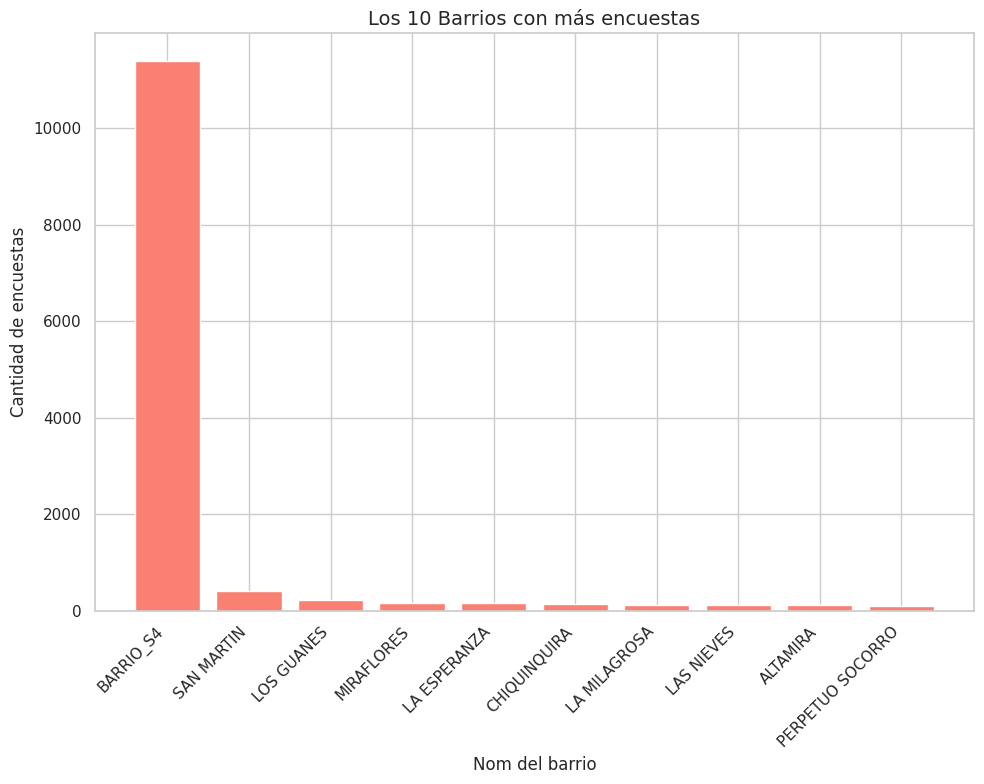

In [ ]:

# Contar los 10 barrios con más encuestas
conteo_barrios = df_2['NOM_BARRIO'].value_counts().head(10)

plt.figure(figsize=(10, 8))
plt.bar(conteo_barrios.index, conteo_barrios.values, color='salmon')

plt.title('Los 10 Barrios con más encuestas', fontsize=14)
plt.xlabel('Nom del barrio', fontsize=12)
plt.ylabel('Cantidad de encuestas', fontsize=12)

plt.xticks(rotation=45, ha='right')


plt.grid(axis='y', linestyle='-', alpha=1)

plt.tight_layout()
plt.show()

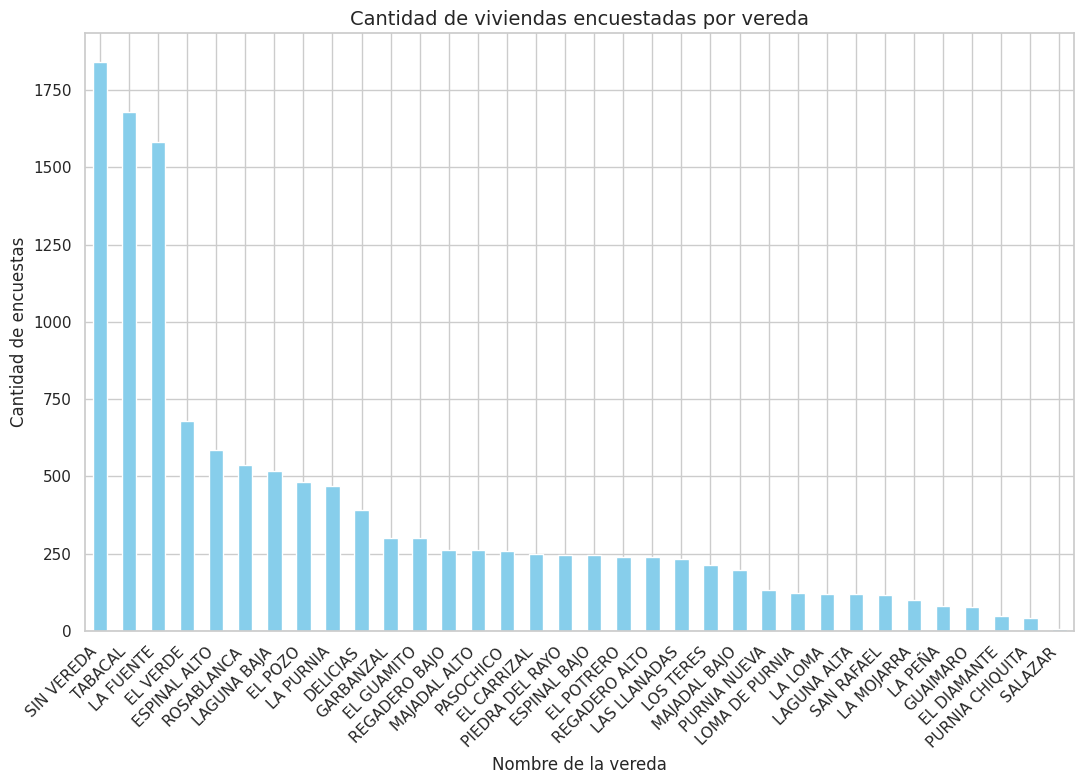

In [ ]:
# Contar cuántas viviendas se encuestaron por vereda
conteo_veredas = df_2['NOM_VEREDA'].value_counts()

plt.figure(figsize=(11, 8))

conteo_veredas.plot(kind='bar', color='skyblue')

plt.title(' viviendas encuestadas por vereda', fontsize=14)
plt.xlabel('Nombre de la vereda', )
plt.ylabel('Cantidad de encuestas', )

plt.grid(axis='y', linestyle='-', alpha=1)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#anailisis en viviendas

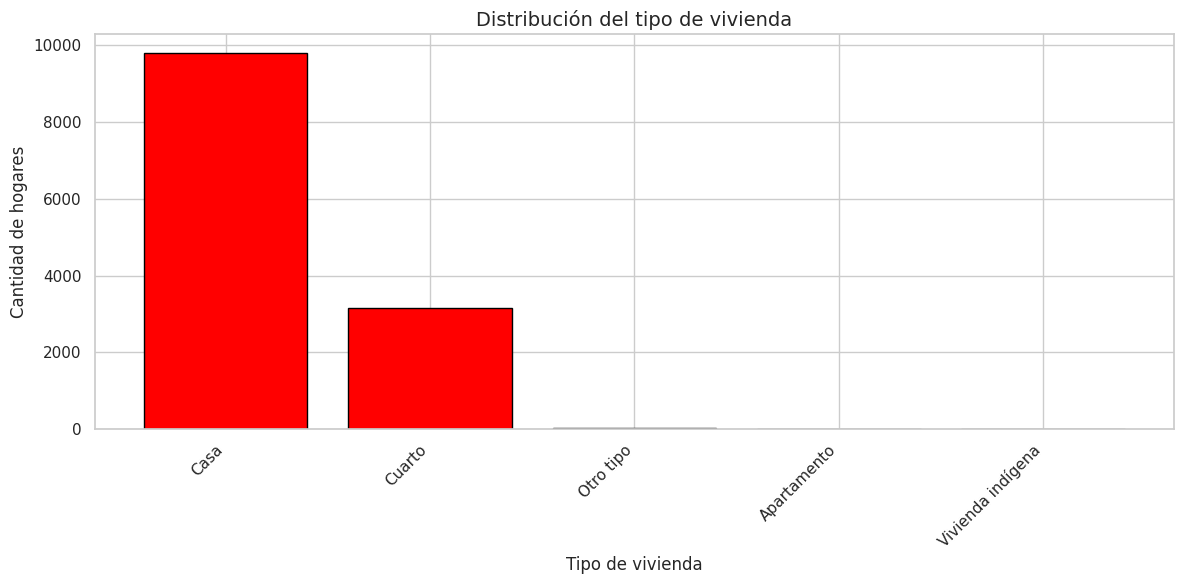

In [ ]:

tipos_vivienda = {
    1: 'Casa',
    2: 'Apartamento',
    3: 'Cuarto',
    4: 'Otro tipo',
    5: 'Vivienda indígena'
}
viviendas_texto = df_2['tip_vivienda'].replace(tipos_vivienda)

conteo_viviendas = viviendas_texto.value_counts()

plt.figure(figsize=(12, 6))
plt.bar(conteo_viviendas.index, conteo_viviendas.values,
        color='red', edgecolor='black')

plt.title('Distribución del tipo de vivienda', fontsize=14)
plt.xlabel('Tipo de vivienda', )
plt.ylabel('Cantidad de hogares', )

plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='-', alpha=1)

plt.tight_layout()
plt.show()


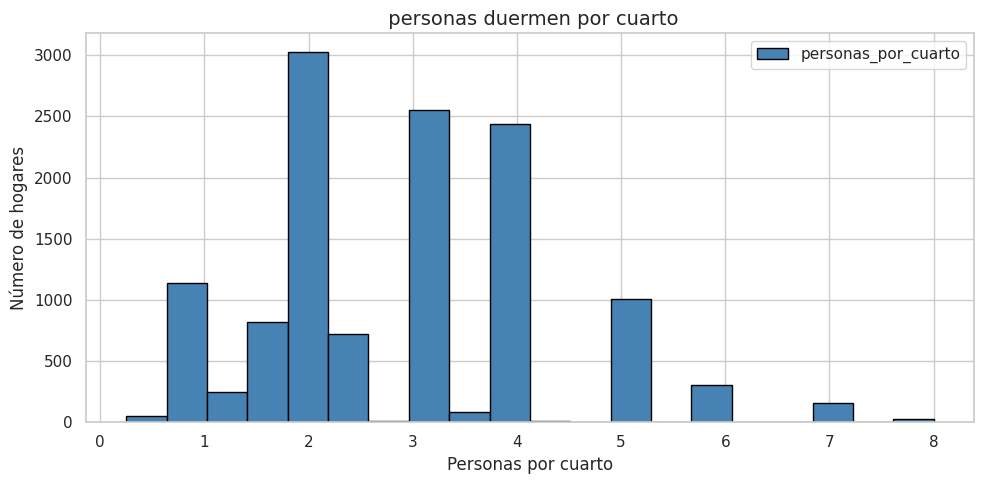

In [ ]:

# Reemplazar ceros por NaN en cuartos para evitar división por cero
df_2['cuartos_limpio'] = df_2['num_cuartos_dormir'].replace(0, np.nan)

df_2['personas_por_cuarto'] = df_2['num_personas_hogar'] / df_2['cuartos_dormir_limpio']

# Eliminar infinitos y valores nulos
personas_por_cuarto_validas = df_2['personas_por_cuarto'].replace([np.inf, -np.inf], np.nan).dropna()

personas_por_cuarto_validas.plot(
    kind='hist',
    bins=20,
    color='steelblue',
    edgecolor='black',
    figsize=(10, 5)
)

plt.title(' personas duermen por cuarto', fontsize=14)
plt.xlabel('Personas por cuarto', fontsize=12)
plt.ylabel('Número de hogares', fontsize=12)


plt.grid(True, linestyle='-', alpha=1)
plt.legend()

plt.tight_layout()
plt.show()

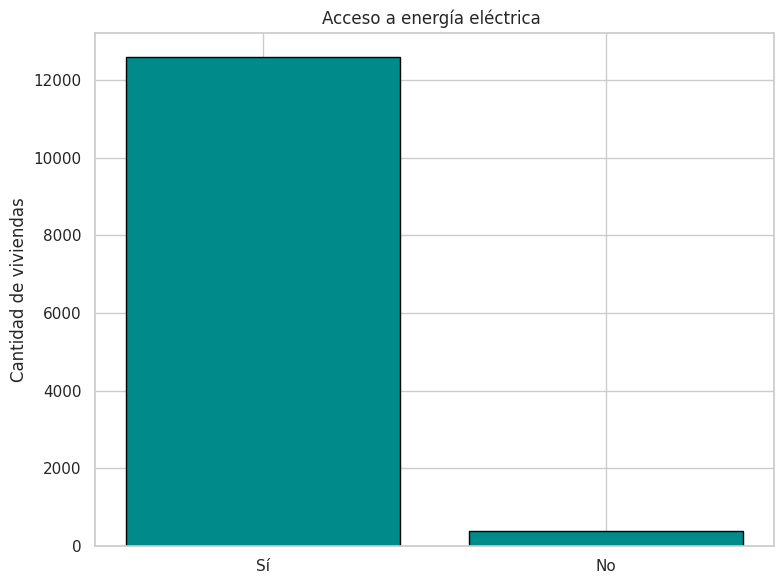

In [ ]:

energia_texto = df_2['ind_tiene_energia'].replace({1: 'Sí', 2: 'No'})

conteo_energia = energia_texto.value_counts()

plt.figure(figsize=(8, 6))
plt.bar(conteo_energia.index, conteo_energia.values, color='darkcyan', edgecolor='black')

plt.title('Acceso a energía eléctrica ', )
plt.ylabel('Cantidad de viviendas', )

plt.grid(axis='y', linestyle='-', alpha=1)

plt.tight_layout()
plt.show()

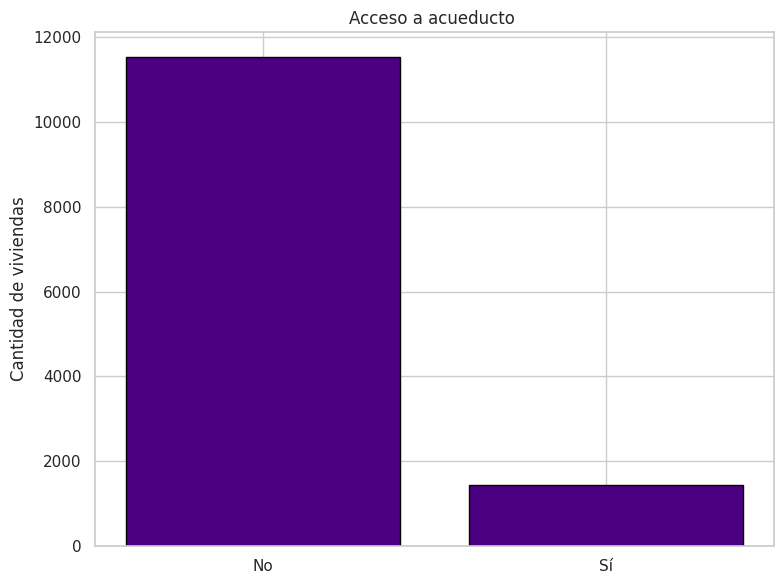

In [ ]:
acueducto_texto = df_2['ind_tiene_acueducto'].replace({1: 'Sí', 2: 'No'})

conteo_acueducto = acueducto_texto.value_counts()

plt.figure(figsize=(8, 6))
plt.bar(conteo_acueducto.index, conteo_acueducto.values, color='indigo', edgecolor='black')

plt.title('Acceso a acueducto ', )

plt.ylabel('Cantidad de viviendas', )

plt.grid(axis='y', linestyle='-', alpha=1)

plt.tight_layout()
plt.show()


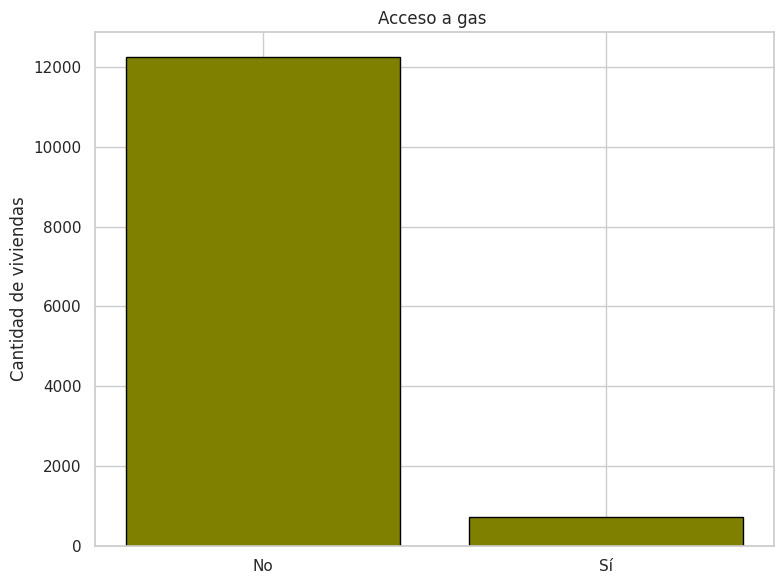

In [ ]:

gas_texto = df_2['ind_tiene_gas'].replace({1: 'Sí', 2: 'No'})

conteo_gas = gas_texto.value_counts()

plt.figure(figsize=(8, 6))
plt.bar(conteo_gas.index, conteo_gas.values, color='olive', edgecolor='black')

plt.title('Acceso a gas ',)

plt.ylabel('Cantidad de viviendas', )

plt.grid(axis='y', linestyle='-', alpha=1)

plt.tight_layout()
plt.show()


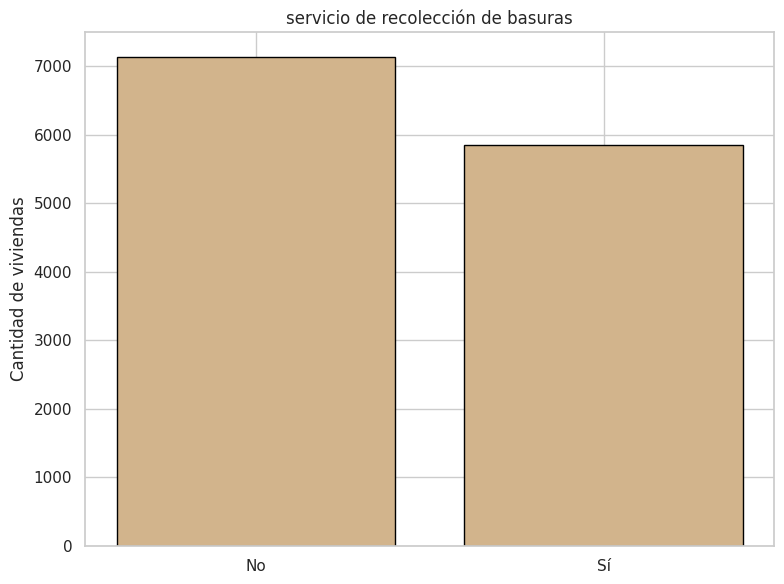

In [ ]:

recoleccion_texto = df_2['ind_tiene_recoleccion'].replace({1: 'Sí', 2: 'No'})

conteo_recoleccion = recoleccion_texto.value_counts()

plt.figure(figsize=(8, 6))
plt.bar(conteo_recoleccion.index, conteo_recoleccion.values, color='tan', edgecolor='black')

plt.title('servicio de recolección de basuras', )
plt.ylabel('Cantidad de viviendas', )

plt.grid(axis='y', linestyle='-', alpha=1)

plt.tight_layout()
plt.show()


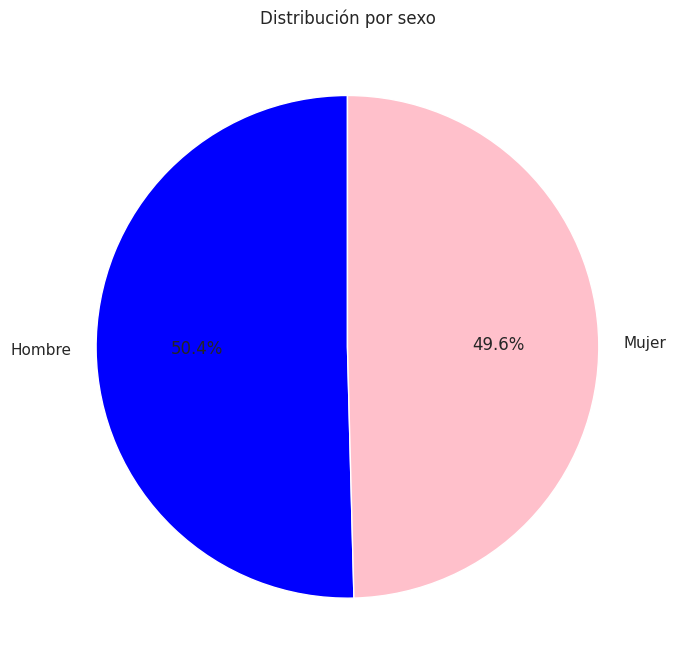

In [ ]:

sexo = df_2['sexo_persona'].replace({1: 'Hombre', 2: 'Mujer'})

conteo_sexo = sexo.value_counts()

plt.figure(figsize=(7, 7))
plt.pie(
    conteo_sexo.values,
    labels=conteo_sexo.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['blue', 'pink']
)

plt.title('Distribución por sexo', )

plt.tight_layout()
plt.show()

#hogar

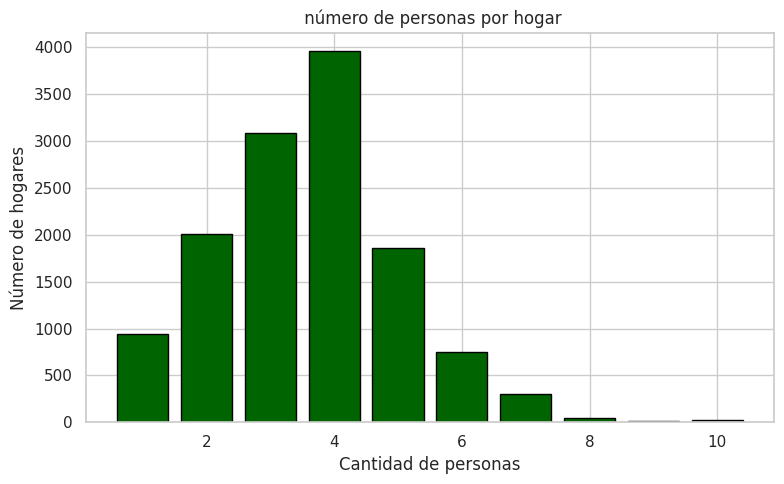

In [ ]:

conteo_personas = df_2['num_personas_hogar'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(conteo_personas.index, conteo_personas.values, color='darkgreen', edgecolor='black')

plt.title(' número de personas por casa', )
plt.xlabel('Cantidad de personas', )
plt.ylabel('Número de hogares', )

plt.grid(axis='y', linestyle='-', alpha=1)

plt.tight_layout()
plt.show()


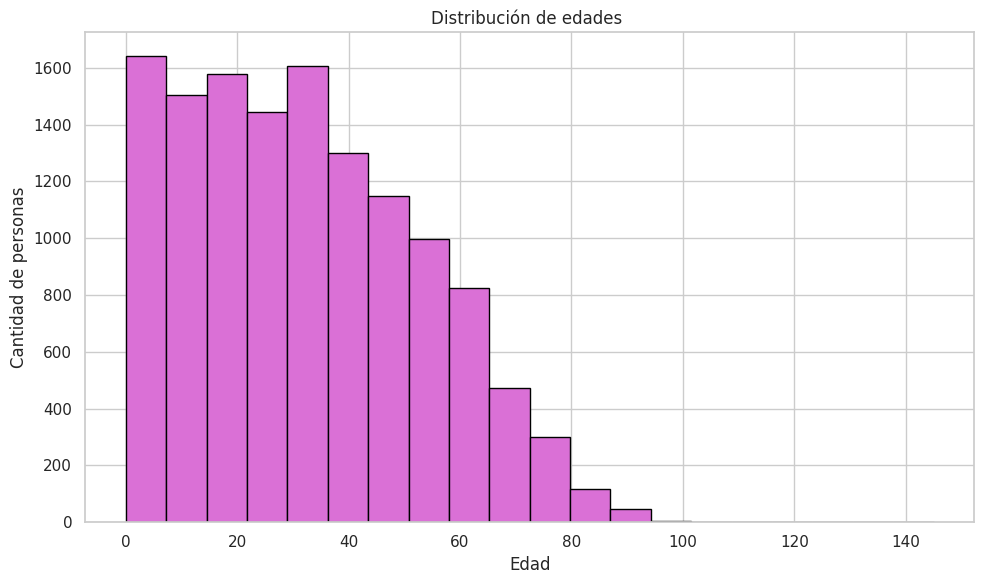

In [ ]:

df_2['edad_calculada'].plot(
    kind='hist',
    bins=20,
    color='orchid',
    edgecolor='black',
    figsize=(10, 6)
)

plt.title('Distribución de edades ', )
plt.xlabel('Edad', )
plt.ylabel('Cantidad de personas', )
plt.grid(True, linestyle='-', alpha=1)
plt.tight_layout()
plt.show()

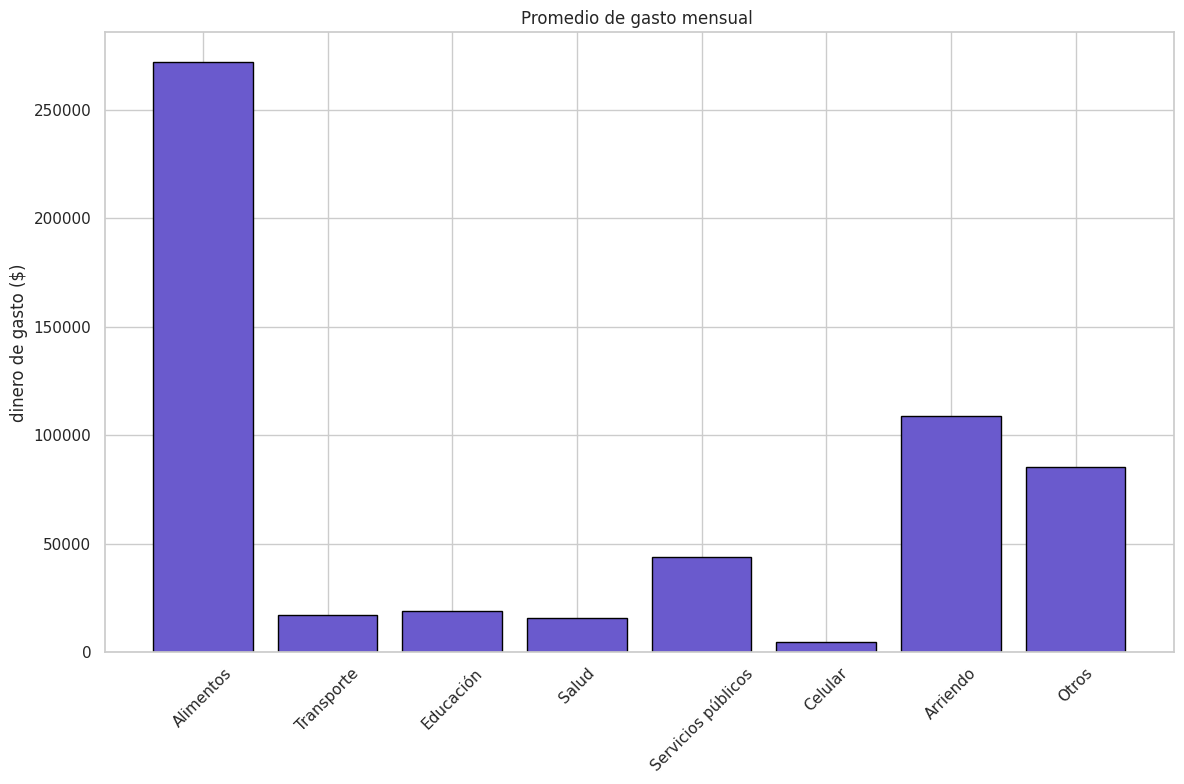

In [ ]:

categorias_gasto = [
    ('Alimentos', 'vlr_gasto_alimento'),
    ('Transporte', 'vlr_gasto_transporte'),
    ('Educación', 'vlr_gasto_educacion'),
    ('Salud', 'vlr_gasto_salud'),
    ('Servicios públicos', 'vlr_gasto_serv_publicos'),
    ('Celular', 'vlr_gasto_celular'),
    ('Arriendo', 'vlr_gasto_arriendo'),
    ('Otros', 'vlr_gasto_otros')
]

nombres = []
promedios = []

for nombre, columna in categorias_gasto:
    promedio = df_2[columna].mean()
    nombres.append(nombre)
    promedios.append(promedio)

plt.figure(figsize=(12, 8))
plt.bar(nombres, promedios, color='slateblue', edgecolor='black')

plt.title('Promedio de gasto mensual ', )
plt.ylabel('dinero de gasto ($)', )
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=1)
plt.tight_layout()
plt.show()


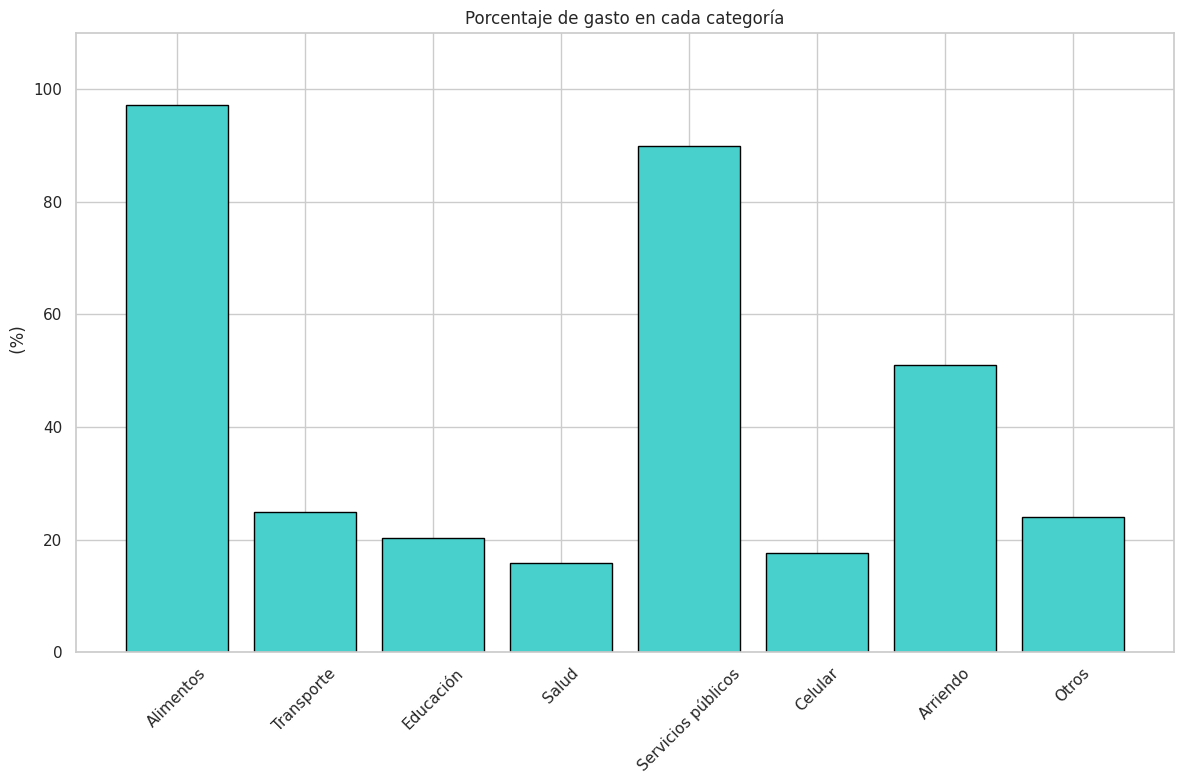

In [ ]:

gastos = [
    ('Alimentos', 'ind_gasto_alimento'),
    ('Transporte', 'ind_gasto_transporte'),
    ('Educación', 'ind_gasto_educacion'),
    ('Salud', 'ind_gasto_salud'),
    ('Servicios públicos', 'ind_gasto_serv_publicos'),
    ('Celular', 'ind_gasto_celular'),
    ('Arriendo', 'ind_gasto_arriendo'),
    ('Otros', 'ind_gasto_otros')
]

nombres = []
porcentajes = []

for nombre, columna in gastos:
    porcentaje = df_2[columna].eq(1).mean() * 100
    nombres.append(nombre)
    porcentajes.append(porcentaje)

plt.figure(figsize=(12, 8))
plt.bar(nombres, porcentajes, color='mediumturquoise', edgecolor='black')

plt.title('Porcentaje de gasto en cada categoría', )
plt.ylabel(' (%)')
plt.xticks(rotation=45)
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='-', alpha=1)
plt.tight_layout()
plt.show()


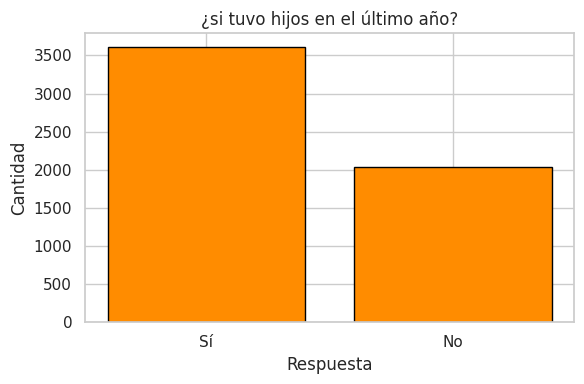

In [ ]:

datos_hijos = df_2.loc[df_2['ind_tuvo_hijos'].isin([1, 2]), 'ind_tuvo_hijos']

respuestas = datos_hijos.map({1: 'Sí', 2: 'No'})

plt.figure(figsize=(6, 4))
plt.bar(respuestas.value_counts().index, respuestas.value_counts().values,
        color='darkorange', edgecolor='black')

plt.title('¿si tuvo hijos en el último año?', )
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.grid(axis='y', linestyle='-', alpha=1)
plt.tight_layout()
plt.show()


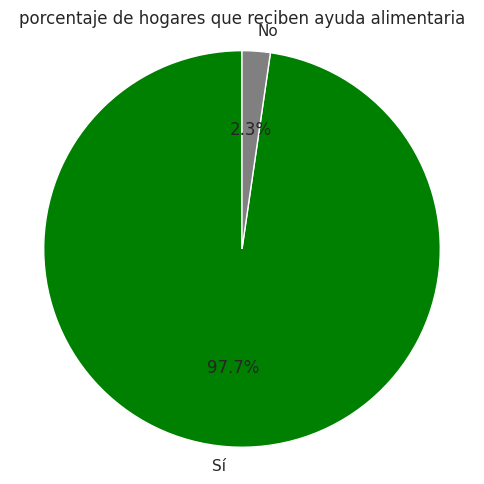

In [ ]:
comida_ayuda = df_2.loc[df_2['ind_recibe_comida'].isin([1, 2]), 'ind_recibe_comida']
comida_ayuda = comida_ayuda.map({1: 'Sí', 2: 'No'})

conteo_comida = comida_ayuda.value_counts()

fig, ax = plt.subplots(figsize=(5,5))

ax.pie(conteo_comida, labels=conteo_comida.index, autopct='%1.1f%%',
       startangle=90, colors=['green', 'grey'])

ax.set_title('porcentaje de hogares que reciben ayuda alimentaria', )
ax.axis('equal')
plt.tight_layout()
plt.show()


#economia

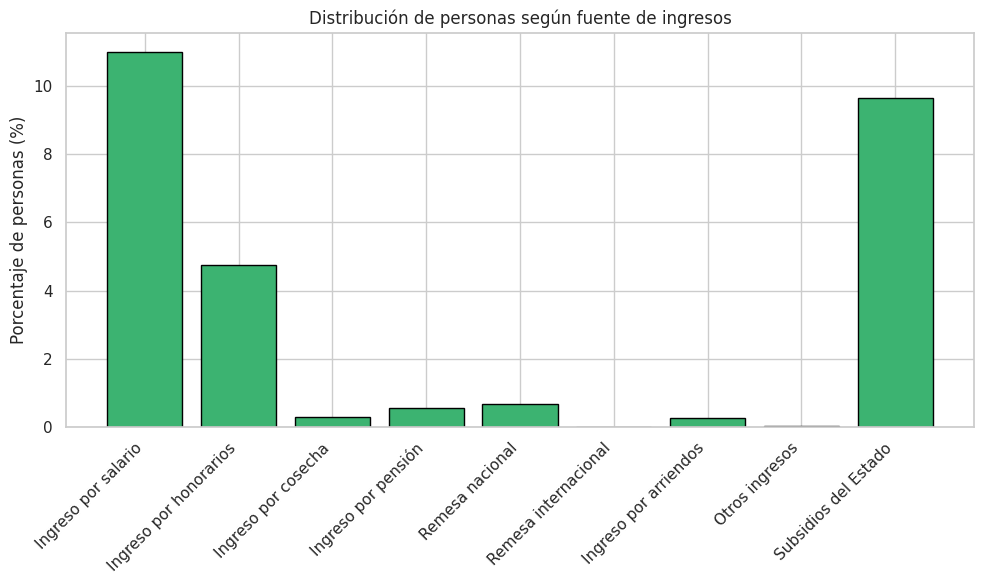

In [ ]:
fuentes_ingreso = {
    'ind_ingr_salario': 'Ingreso por salario',
    'ind_ingr_honorarios': 'Ingreso por honorarios',
    'ind_ingr_cosecha': 'Ingreso por cosecha',
    'ind_ingr_pension': 'Ingreso por pensión',
    'ind_ingr_remesa_pais': 'Remesa nacional',
    'ind_ingr_remesa_exterior': 'Remesa internacional',
    'ind_ingr_arriendos': 'Ingreso por arriendos',
    'ind_otros_ingresos': 'Otros ingresos',
    'ind_ingr_estado': 'Subsidios del Estado'
}

porcentajes_fuentes = {
    nombre: df_2[col].isin([1]).mean() * 100
    for col, nombre in fuentes_ingreso.items()
}

plt.figure(figsize=(10, 6))
barras = plt.bar(
    list(porcentajes_fuentes.keys()),
    list(porcentajes_fuentes.values()),
    color='mediumseagreen',
    edgecolor='black'
)

plt.title('Distribución de personas según fuente de ingresos', )
plt.ylabel('Porcentaje de personas (%)', )
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='-', alpha=1)


plt.tight_layout()
plt.show()


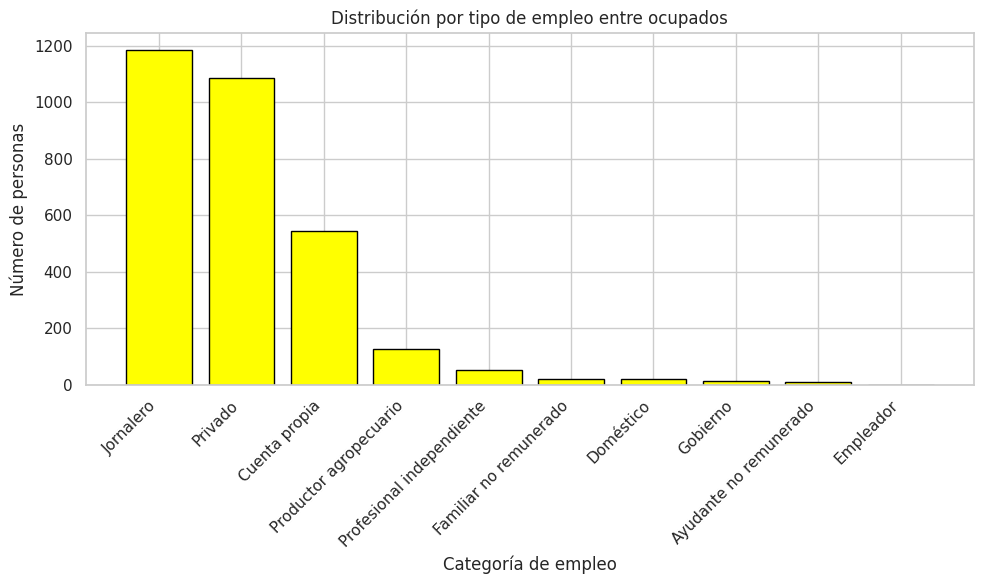

In [ ]:

tipos_empleo = {
    1: 'Privado',
    2: 'Gobierno',
    3: 'Doméstico',
    4: 'Profesional independiente',
    5: 'Cuenta propia',
    6: 'Empleador',
    7: 'Productor agropecuario',
    8: 'Familiar no remunerado',
    9: 'Ayudante no remunerado',
    10: 'Jornalero',
    99: 'Sin dato'
}
df_2['categoria_empleo'] = df_2['tip_empleado'].map(tipos_empleo)

conteo_empleo = df_2['categoria_empleo'].value_counts().drop('Sin dato', errors='ignore')

plt.figure(figsize=(10, 6))
bars = plt.bar(conteo_empleo.index, conteo_empleo.values, color='yellow', edgecolor='black')

plt.title('Distribución por tipo de empleo entre ocupados', )
plt.xlabel('Categoría de empleo', )
plt.ylabel('Número de personas', )
plt.grid(axis='y', linestyle='-', alpha=1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

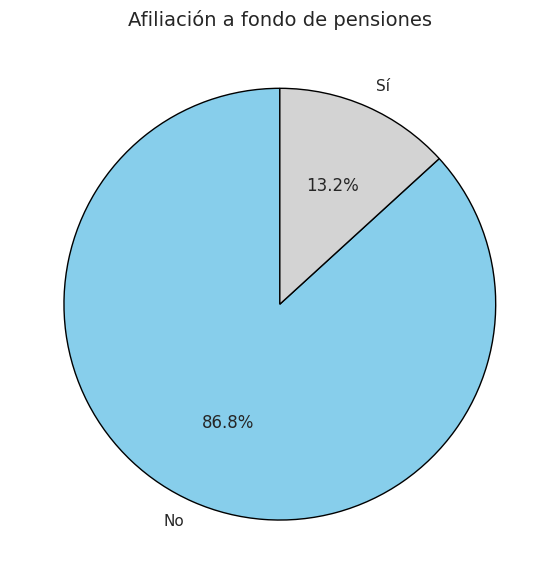

In [ ]:

df_2['afiliado_fondo'] = df_2['ind_fondo_pensiones'].map({1: 'Sí', 2: 'No'})

conteo = df_2['afiliado_fondo'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=90,
        colors=['skyblue', 'lightgray'], wedgeprops={'edgecolor': 'black'})

plt.title('Afiliación a fondo de pensiones', )
plt.tight_layout()
plt.show()

#bienes

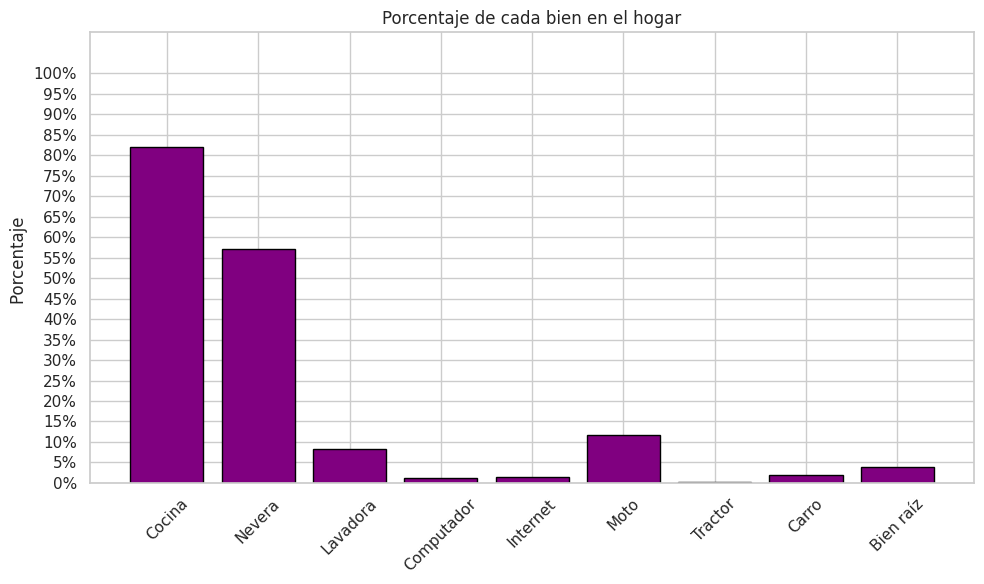

In [ ]:
columnas = [
    'ind_tiene_cocina', 'ind_tiene_nevera', 'ind_tiene_lavadora',
    'ind_tiene_pc', 'ind_tiene_internet', 'ind_tiene_moto',
    'ind_tiene_tractor', 'ind_tiene_carro', 'ind_tiene_bien_raiz'
]

etiquetas = [
    'Cocina', 'Nevera', 'Lavadora', 'Computador', 'Internet',
    'Moto', 'Tractor', 'Carro', 'Bien raíz'
]

valores = [
    (df_2[col].isin([1, 2]) & (df_2[col] == 1)).mean() * 100 for col in columnas
]

plt.figure(figsize=(10,6))
bars = plt.bar(etiquetas, valores, color='purple', edgecolor='black')

plt.yticks(range(0, 101, 5), [f'{i}%' for i in range(0, 101, 5)])


plt.title('Porcentaje de cada bien en el hogar', )
plt.ylabel('Porcentaje ')
plt.xticks(rotation=45)
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='-', alpha=1)


plt.tight_layout()
plt.show()


#educacion

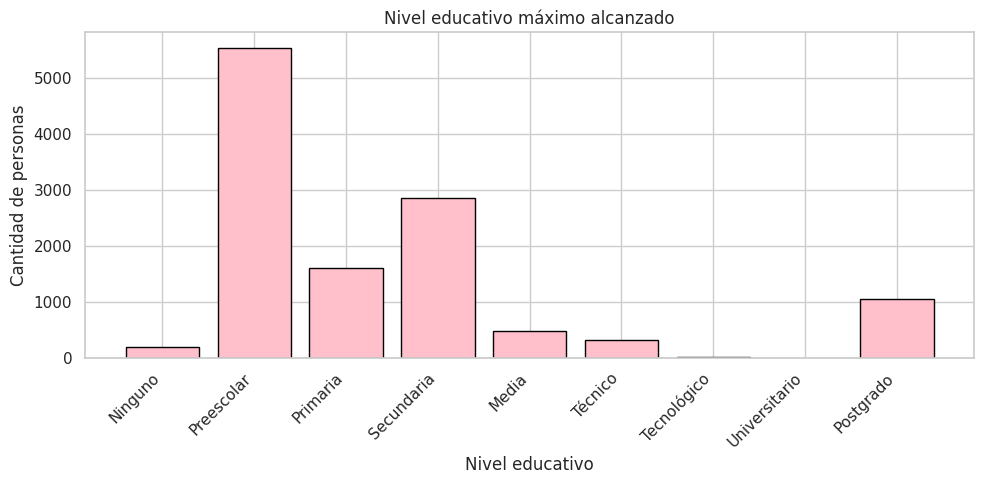

In [ ]:

niveles = {
    1: 'Ninguno', 2: 'Preescolar', 3: 'Primaria',
    4: 'Secundaria', 5: 'Media', 6: 'Técnico',
    7: 'Tecnológico', 8: 'Universitario', 9: 'Postgrado'
}

df_2['Nivel_educ'] = df_2['niv_educativo'].map(niveles)

niveles_orden = [
    'Ninguno', 'Preescolar', 'Primaria', 'Secundaria',
    'Media', 'Técnico', 'Tecnológico', 'Universitario', 'Postgrado'
]

conteo_educ = df_2['Nivel_educ'].value_counts().reindex(niveles_orden)

plt.figure(figsize=(10, 5))
plt.bar(conteo_educ.index, conteo_educ.values, color='pink', edgecolor='black')

plt.title('Nivel educativo máximo alcanzado',)
plt.xlabel('Nivel educativo',)
plt.ylabel('Cantidad de personas',)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='-', alpha=1)
plt.tight_layout()
plt.show()


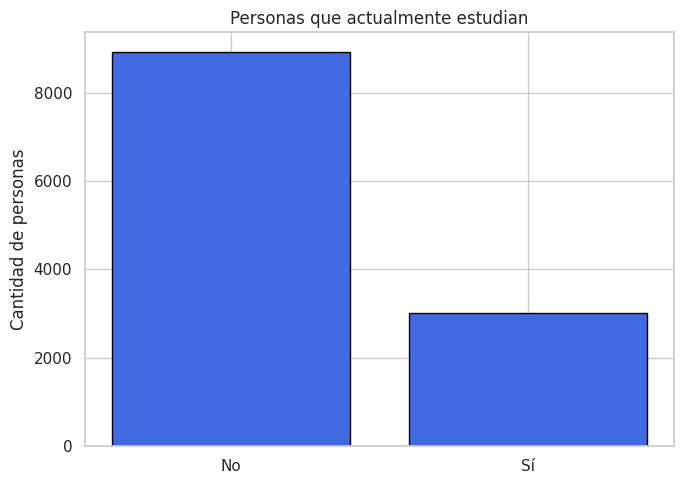

In [ ]:

estudia_series = df_2['ind_estudia'].map({1: 'Sí', 2: 'No'})

conteo_estudia = estudia_series.value_counts()

plt.figure(figsize=(7, 5))
plt.bar(conteo_estudia.index, conteo_estudia.values, color='royalblue', edgecolor='black')

plt.title('Personas que actualmente estudian', )
plt.ylabel('Cantidad de personas', )
plt.grid(axis='y', linestyle='-', alpha=1)
plt.tight_layout()
plt.show()

#desastres

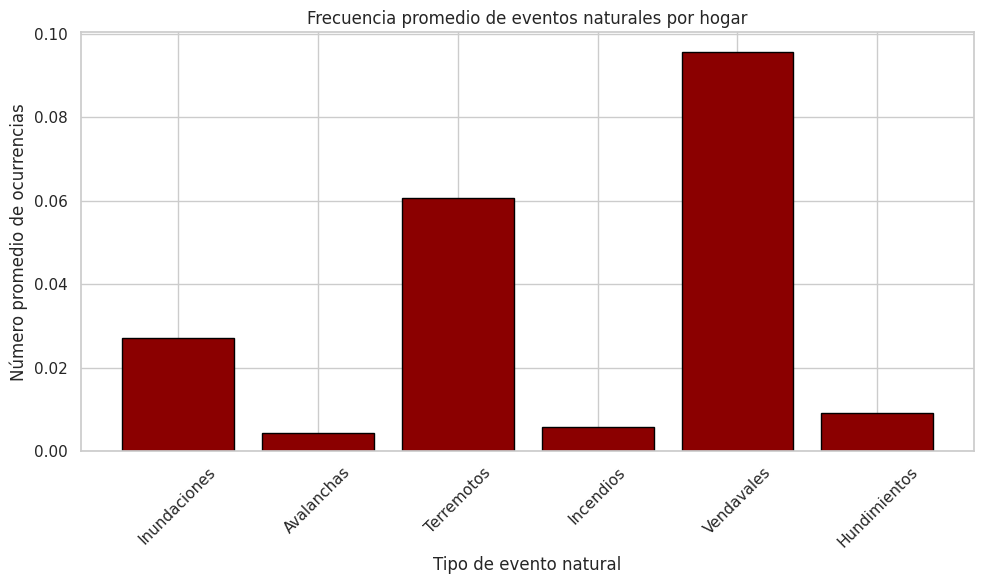

In [ ]:

eventos = [
    'num_evento_inundacion', 'num_evento_avalancha', 'num_evento_terremoto',
    'num_evento_incendio', 'num_evento_vendaval', 'num_evento_hundimiento'
]

nombres_eventos = [
    'Inundaciones', 'Avalanchas', 'Terremotos',
    'Incendios', 'Vendavales', 'Hundimientos'
]

valores_promedio = [df_2[col].mean() for col in eventos]

fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(nombres_eventos, valores_promedio, color='darkred', edgecolor='black')

ax.set_title('Frecuencia promedio de eventos naturales por hogar', )
ax.set_ylabel('Número promedio de ocurrencias', )
ax.set_xlabel('Tipo de evento natural', )
ax.grid(axis='y', linestyle='-', alpha=1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
